# In Class Example 1-D

13 13 13


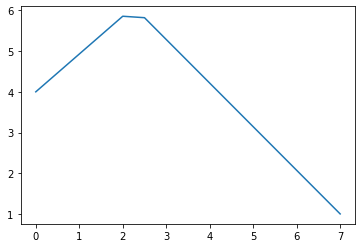

In [18]:
import numpy as np
import matplotlib.pyplot as plt

maxerror = 1e-6

a = 0
b = 7
N = 15

x,h = np.linspace(a,b,N,retstep=True)
y = np.zeros_like(x)

ϵ = 1
ρ = np.zeros_like(x)
ρ[4:6] = 2
y[0] = 4
y[-1] = 1

plt.figure()
print(len(y[1:-1]),len(y[2:],),len(y[:-2]))
delta = y-x
while max(delta)>maxerror:
    #plt.plot(x,y)
    yold = y.copy()
    y[1:-1] = (y[2:]+y[:-2] + h*h*ρ[1:-1]/ϵ) / 2
    delta = y-yold

plt.plot(x,y)
plt.show()


# In Class Example 2-D - SLOW

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M = 50
V = 1
δ = 1e-6

phi = np.zeros([M+1,M+1])
phi[0,:] = V
phiprime = np.empty([M+1,M+1])

Δ = 1
while Δ>δ:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i ==M or j==0 or j==M:
                phiprime[i,j]= phi[i,j]
            else:
                phiprime[i,j]=(phiprime[i+1,j]+phiprime[i-1,j]+phiprime[i,j-1]+phiprime[i,j+1])/4
    
    Δ = np.max(abs(phi-phiprime))
    phi,phiprime = phiprime,phi
plt.imshow(phi)
plt.hot()
plt.colorbar()
plt.show()

# Exercise 9.2
### Introduction
Square box with a voltage of 1 at the top wall and 0 around the rest. Use slicing to calculate it. 

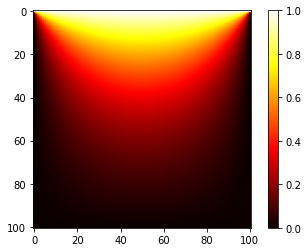

In [11]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
V = 1
δ = 1e-6

phi = np.zeros([M+1,M+1])
phi[0,:] = V
phiprime = phi.copy()

Δ = 1
while Δ>δ:
#     for i in range(M+1):
#         for j in range(M+1):
#             if i==0 or i ==M or j==0 or j==M:
#                 phiprime[i,j]= phi[i,j]
#             else:
#                 phiprime[i,j]=(phiprime[i+1,j]+phiprime[i-1,j]+phiprime[i,j-1]+phiprime[i,j+1])/4
    
    phiprime[1:-1,1:-1] = (phi[:-2,1:-1]+phi[2:,1:-1]+phi[1:-1,2:]+phi[1:-1,:-2])/4
    Δ = np.max(abs(phi-phiprime))
    phi,phiprime = phiprime,phi
plt.imshow(phi)
plt.hot()
plt.colorbar()
plt.show()

### Conclusion
Thank you for not making us to G-S. This is so much easier. 

# Exercise 9.3

### Introduction
A simple capacitor is modelled with a 10 cm by 10 cm box has two metal plates. The plates have the voltages of 1 V and -1 V. Need precission withing $10^{-6}$ V. Make a density plot.

It says to use any method, I am using what we did in class.

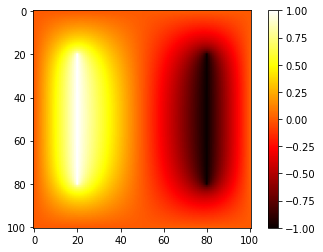

In [10]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
V = 1
δ = 1e-6

phi = np.zeros([M+1,M+1])
phiprime = phi.copy()
phiprime[20:81,20] = 1
phiprime[20:81,80]= -1
Δ = 1
while Δ>δ:
#     for i in range(M+1):
#         for j in range(M+1):
#             if i==0 or i ==M or j==0 or j==M:
#                 phiprime[i,j]= phi[i,j]
#             else:
#                 phiprime[i,j]=(phiprime[i+1,j]+phiprime[i-1,j]+phiprime[i,j-1]+phiprime[i,j+1])/4
    
    phiprime[1:-1,1:-1] = (phi[:-2,1:-1]+phi[2:,1:-1]+phi[1:-1,2:]+phi[1:-1,:-2])/4
    phiprime[20:81,20] = 1
    phiprime[20:81,80]= -1
    Δ = np.max(abs(phi-phiprime))
    phi,phiprime = phiprime,phi
plt.imshow(phi)
plt.hot()
plt.colorbar()
plt.show()

### Conclusion
I like the way this looks. The slicing definitely makes more sense. I was confused at first because I didn't know how it changed in between, but then I realized I didn't need to know!